### Вариант 13

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
df = pd.read_excel('Data_cluster_Fingas_2.xlsx', index_col=0)

In [28]:
df.head()

,Density,Viscosity,Resins,Asphaltenes,Actual stability
Oil,,,,,
Albian Heavy Synthetic,0.9372,156,26,6,19.0
Arabian Light,0.8658,14,6,3,23.3
Arabian Medium,0.8783,29,7,6,21.0
Canolimon,0.8817,46,8,8,27.2
Canolimon,0.8961,103,8,9,19.9


In [31]:
print('Количество объектов: ',len(df))
df.dtypes

Количество объектов:  124


Density             float64
Viscosity             int64
Resins                int64
Asphaltenes           int64
Actual stability    float64
dtype: object

сделаем все значения float

In [32]:
df['Viscosity'] = df['Viscosity'].astype('float')
df['Resins'] = df['Resins'].astype('float')
df['Asphaltenes'] = df['Asphaltenes'].astype('float')
df.dtypes

Density             float64
Viscosity           float64
Resins              float64
Asphaltenes         float64
Actual stability    float64
dtype: object

In [33]:
df.head()

,Density,Viscosity,Resins,Asphaltenes,Actual stability
Oil,,,,,
Albian Heavy Synthetic,0.9372,156.0,26.0,6.0,19.0
Arabian Light,0.8658,14.0,6.0,3.0,23.3
Arabian Medium,0.8783,29.0,7.0,6.0,21.0
Canolimon,0.8817,46.0,8.0,8.0,27.2
Canolimon,0.8961,103.0,8.0,9.0,19.9


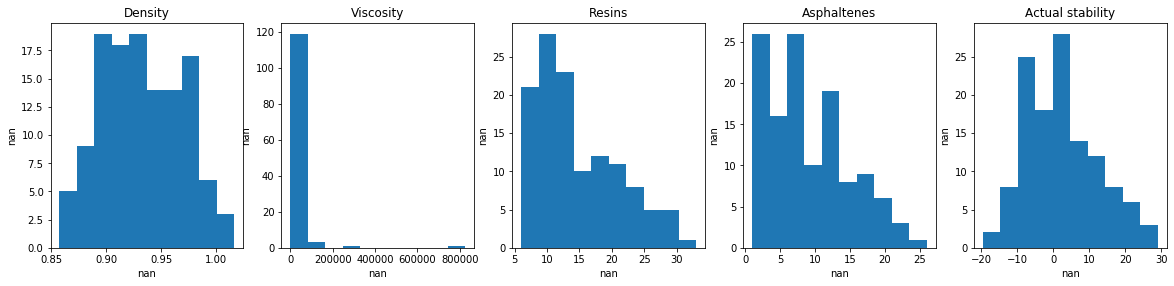

In [34]:
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in list(df):
    plot_number += 1
    pyplot.subplot(5, 5, plot_number)
    pyplot.hist(df[feature_name])
    pyplot.title(feature_name)
    pyplot.xlabel('nan')
    pyplot.ylabel('nan')

z(1) = (x - min(x))/(max(x)-min(x))
расстояние до ближайшего соседа
'single'

найдем минимальные и максимальные значения для каждого столбца

In [35]:
list(df)

['Density', 'Viscosity', 'Resins', 'Asphaltenes', 'Actual stability']

In [36]:
minmaxdict = {
              feature_name: [min(df['{}'.format(feature_name)]),
                             max(df['{}'.format(feature_name)])] 
              for feature_name in list(df)
             }  

In [37]:
minmaxdict

{'Density': [0.8574, 1.0166],
 'Viscosity': [14.0, 825000.0],
 'Resins': [6.0, 33.0],
 'Asphaltenes': [1.0, 26.0],
 'Actual stability': [-19.5, 29.1]}

Делаем нормализацию, для каждого признака   

In [38]:
for feature_name in list(df):
    for i in range(len(df['{}'.format(feature_name)])):
        x = (df['{}'.format(feature_name)][i])
        x_min = (minmaxlist['{}'.format(feature_name)][0])
        x_max = (minmaxlist['{}'.format(feature_name)][1])
        df['{}'.format(feature_name)][i] = (x - x_min)/(x_max - x_min)

Проверим нормализацию

In [39]:
minmaxdict_normalize = {
              feature_name: [min(df['{}'.format(feature_name)]),
                             max(df['{}'.format(feature_name)])] 
              for feature_name in list(df)
             }

In [40]:
minmaxdict_normalize

{'Density': [0.0, 1.0],
 'Viscosity': [0.0, 1.0],
 'Resins': [0.0, 1.0],
 'Asphaltenes': [0.0, 1.0],
 'Actual stability': [0.0, 1.0]}

In [42]:
df.head()

,Density,Viscosity,Resins,Asphaltenes,Actual stability
Oil,,,,,
Albian Heavy Synthetic,0.501256,0.000172,0.740741,0.20,0.792181
Arabian Light,0.052764,0.000000,0.000000,0.08,0.880658
Arabian Medium,0.131281,0.000018,0.037037,0.20,0.833333
Canolimon,0.152638,0.000039,0.074074,0.28,0.960905
Canolimon,0.243090,0.000108,0.074074,0.32,0.810700


Построим гистограммы еще раз и посмотрим как они изменились, ось X должна быть в интервале [0;1]

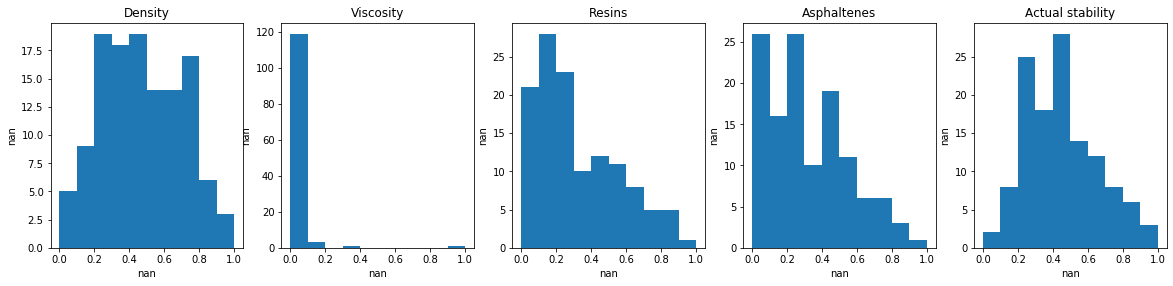

In [43]:
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in list(df):
    plot_number += 1
    pyplot.subplot(5, 5, plot_number)
    pyplot.hist(df[feature_name])
    pyplot.title(feature_name)
    pyplot.xlabel('nan')
    pyplot.ylabel('nan')

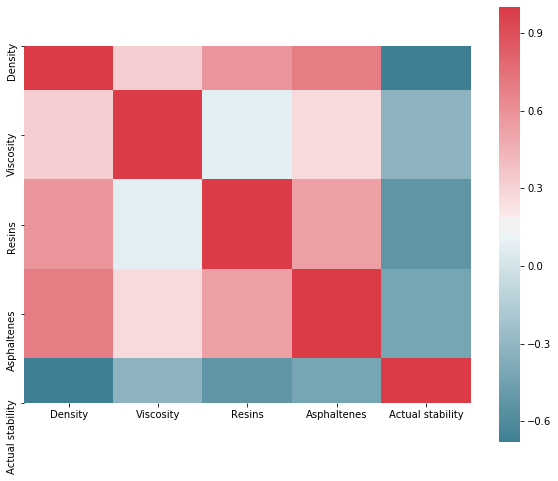

In [44]:
f, ax = pyplot.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

Видим как с признаком Density коррелируют признаки Viscosity и Asphaltenes, понимаем по розовому цвету

Теперь построим 3d график

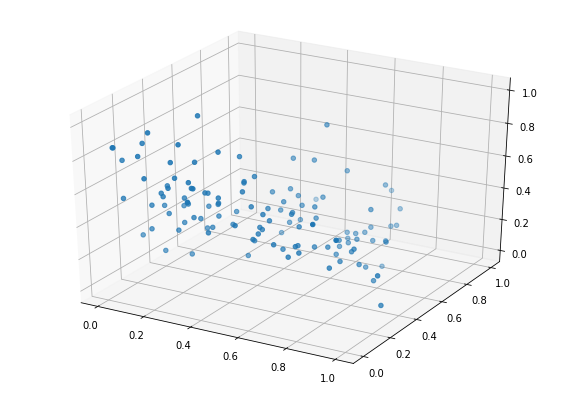

In [45]:
from mpl_toolkits.mplot3d import Axes3D

s = np.random.randint(10, 100, 20)
fig = plt.figure(figsize(10,7))
ax = fig.gca(projection='3d')
ax.scatter(df['Density'], df['Resins'], df['Actual stability'])

Теперь применим метод K-means и добавам новый признак - klaster

Проблема: в данном методе необходимо указывать количество кластеров, посчитаем Силуэт

Силуэт


В отличие от описанных выше метрик, данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.

In [46]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [47]:
list(df)

['Density', 'Viscosity', 'Resins', 'Asphaltenes', 'Actual stability']


Лучшее значение = 0.41213121217180265
При количестве кластеров = 2


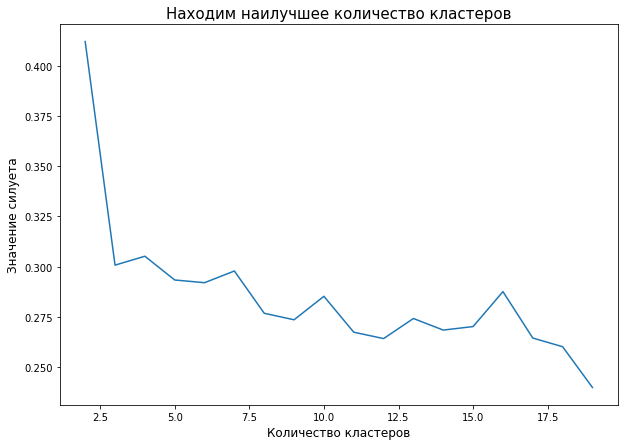

In [48]:
sil,clust = [],[]

for i in range(2,20):
    kmeans_search = KMeans(n_clusters=i, random_state=1)
    numeric_cols = df._get_numeric_data().dropna(axis=1)
    kmeans_search.fit(numeric_cols)
    res_kmeans_search = metrics.silhouette_score(numeric_cols, kmeans_search.labels_)
    #print('Силуэт= ' + str(res_kmeans_search)+' '+str(i)+' Кластеров ')
    sil.append(res_kmeans_search)
    clust.append(i)
    
plt.plot(clust,sil)
figure = plt.gcf()
plt.xlabel('Количество кластеров', fontsize = 12)
plt.ylabel('Значение силуета', fontsize = 12)
plt.title('Находим наилучшее количество кластеров', fontsize = 15)

i = sil.index(max(sil))
print('\nЛучшее значение = ' + str(max(sil))+ '\nПри количестве кластеров = ' + str(clust[i]))

Мы видим, что на количестве кластеров 2 - силуэт показывает хорошее значение

Теперь укажем для K-means 2 кластера и визуализируем результат по трем признакам в 3d, которые использовали выше.

Силуэт= 0.41213121217180265


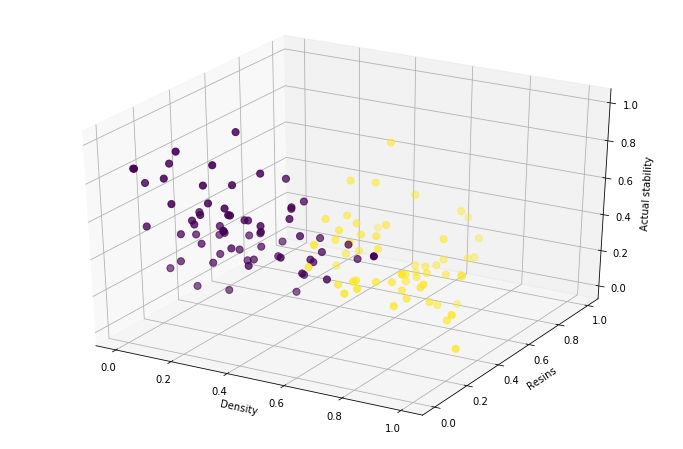

In [50]:
kmeans = KMeans(n_clusters=2, random_state=1)
numeric_cols = df._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)

fig = plt.figure(figsize(12,8))
ax = fig.gca(projection='3d')

ax.scatter(df['Density'], df['Resins'], df['Actual stability'], c=kmeans.labels_, s=50, cmap='viridis')

ax.set_xlabel('Density')
ax.set_ylabel('Resins')
ax.set_zlabel('Actual stability')

res_kmeans = metrics.silhouette_score(numeric_cols, kmeans.labels_)
print('Силуэт= ' + str(res_kmeans))

Попробуем еще несколько алгоритмов

Агломеративная кластеризация

Силуэт= 0.4065430440756156


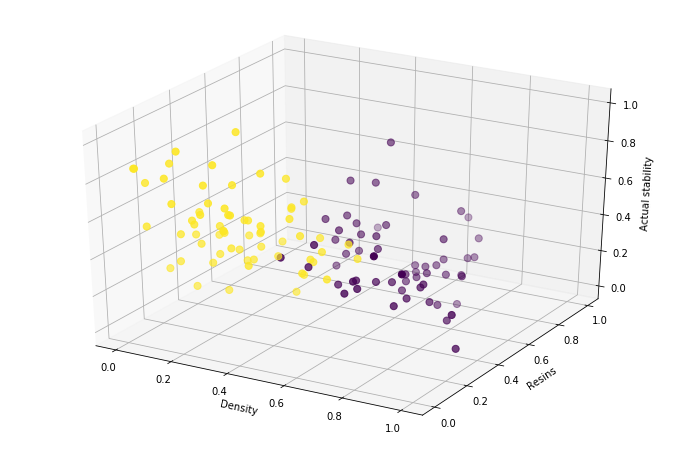

In [51]:
agglo = AgglomerativeClustering(n_clusters=2)
numeric_cols = df._get_numeric_data().dropna(axis=1)
agglo.fit(numeric_cols)

fig = plt.figure(figsize(12,8))
ax = fig.gca(projection='3d')

ax.scatter(df['Density'], df['Resins'], df['Actual stability'], c=agglo.labels_, s=50, cmap='viridis')

ax.set_xlabel('Density')
ax.set_ylabel('Resins')
ax.set_zlabel('Actual stability')

res_agglo = metrics.silhouette_score(numeric_cols, agglo.labels_)
print('Силуэт= ' + str(res_agglo))

И попробуем еще один алгоритм - Спектральная кластеризация

Силуэт= 0.3786123610550329


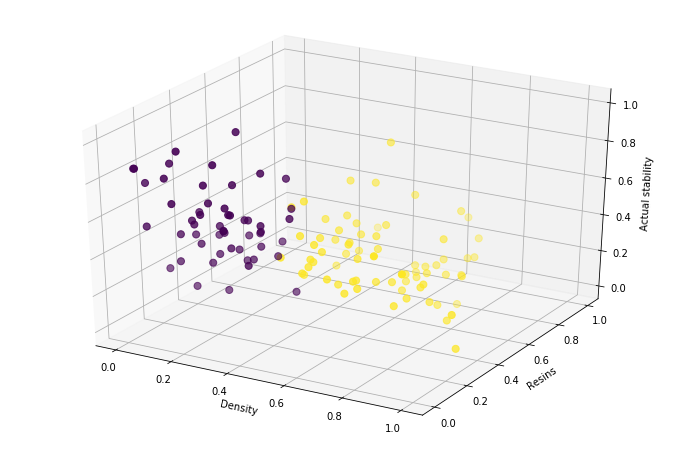

In [52]:
spectr = SpectralClustering(n_clusters=2, random_state=1, affinity='nearest_neighbors')
numeric_cols = df._get_numeric_data().dropna(axis=1)
spectr.fit(numeric_cols)

fig = plt.figure(figsize(12,8))
ax = fig.gca(projection='3d')

ax.scatter(df['Density'], df['Resins'], df['Actual stability'], c=spectr.labels_, s=50, cmap='viridis')

ax.set_xlabel('Density')
ax.set_ylabel('Resins')
ax.set_zlabel('Actual stability')

res_spectr = metrics.silhouette_score(numeric_cols, spectr.labels_)
print('Силуэт= ' + str(res_spectr))

Можем заметить, что лучший результат Силуэта показал алгоритм K-means

Так же на графиках, мы видим место "слияния двух облаков", в этом слиянии находятся значения которые можно отнести и к одному и к другому кластеру, то-есть они являются спорными и непонятными